# Final Project - Question 2

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
hcv=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv', index_col=0)
# treat the 1st column as index
hcv.dropna(inplace=True)
hcv.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [30]:
map_response = {'0=Blood Donor': '0',
'0s=suspect Blood Donor': '1',
'1=Hepatitis': '2',
'2=Fibrosis': '3',
'3=Cirrhosis': '4'}
hcv['response']=hcv['Category'].map(map_response)
hcv['gender']=[1 if x =='m' else 0 for x in hcv['Sex']]
hcv.drop(['Category','Sex'], axis=1, inplace=True)

In [31]:
#print(hcv.columns)
print(hcv['response'].unique())
print(hcv['gender'].unique())
# if logistic regression to be used, it must be multinomial logistic regression

['0' '1' '2' '3' '4']
[1 0]


# Using K-Nearest Neighbors

Split data into train & test data

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
X = hcv.drop("response", axis=1)  
y = hcv["response"] #df is your data and response is the name of the response variable 
print(hcv["response"])

seed=100
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=seed, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

1      0
2      0
3      0
4      0
5      0
      ..
609    4
610    4
611    4
612    4
613    4
Name: response, Length: 589, dtype: object
(412, 12)
(177, 12)


Train a K-Nearest Neighbors Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Make Predictions with our K-Nearest Neighbors Algorithm

In [34]:
predictions = model.predict(X_test)

Measuring the Accuracy of our model

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       159
           1       0.00      0.00      0.00         1
           2       0.33      0.12      0.18         8
           3       0.00      0.00      0.00         4
           4       0.60      0.60      0.60         5

    accuracy                           0.92       177
   macro avg       0.38      0.34      0.35       177
weighted avg       0.89      0.92      0.90       177



c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

This model performs very well with category 0 (blood donors) but does poorly everywhere else. This is because there isn't much data on everything outside category 0

We can try finding a better K value

Best K Value: 6


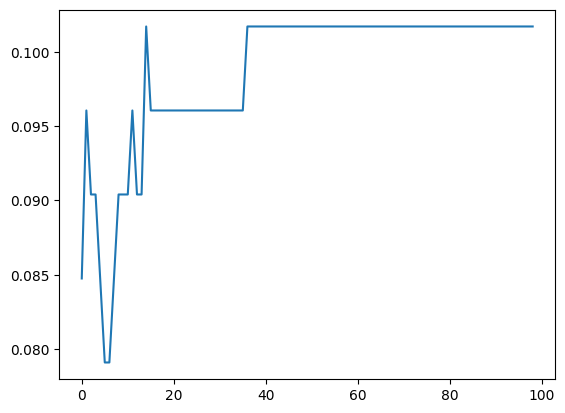

In [36]:
import matplotlib.pyplot as plt
error_rates = []
for i in range(1, 100):
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

plt.plot(error_rates)
min = 1
for num in error_rates:
    if(num < min):
        min = num
print("Best K Value:", error_rates.index(min) + 1)

In [37]:
new_knn_model = KNeighborsClassifier(n_neighbors=6)
new_knn_model.fit(X_train, y_train)
new_knn_pred = new_knn_model.predict(X_test)

print(classification_report(y_test, new_knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       159
           1       0.00      0.00      0.00         1
           2       0.67      0.25      0.36         8
           3       1.00      0.50      0.67         4
           4       0.50      0.20      0.29         5

    accuracy                           0.92       177
   macro avg       0.62      0.39      0.46       177
weighted avg       0.90      0.92      0.90       177



c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

We can try a logistic regression model with balanced class weights to see if that works better


In [38]:
logisticModel = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight="balanced")
logisticModel.fit(X_train, y_train)

logisticPred = logisticModel.predict(X_test)
print(classification_report(y_test, logisticPred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       159
           1       1.00      1.00      1.00         1
           2       0.40      0.25      0.31         8
           3       0.38      0.75      0.50         4
           4       0.67      0.80      0.73         5

    accuracy                           0.94       177
   macro avg       0.69      0.76      0.70       177
weighted avg       0.94      0.94      0.94       177



c:\Users\rowme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
